In [540]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
%matplotlib inline

In [541]:
# load data
train_set = pd.read_csv('train.csv')

test_set = pd.read_csv('test.csv')

print('Train Set\n', train_set.shape, '\n', train_set.isnull().sum())
print('Test Set\n', test_set.shape, '\n', test_set.isnull().sum())
all_set = pd.concat([train_set, test_set])


Train Set
 (15035, 21) 
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Test Set
 (6468, 20) 
 id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [542]:
train_set.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [543]:
test_set.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [544]:
# check if there is any null values
print(all_set.isnull().sum(), '\n -----------data types------------\n',all_set.dtypes)

bathrooms           0
bedrooms            0
condition           0
date                0
floors              0
grade               0
id                  0
lat                 0
long                0
price            6468
sqft_above          0
sqft_basement       0
sqft_living         0
sqft_living15       0
sqft_lot            0
sqft_lot15          0
view                0
waterfront          0
yr_built            0
yr_renovated        0
zipcode             0
dtype: int64 
 -----------data types------------
 bathrooms        float64
bedrooms           int64
condition          int64
date              object
floors           float64
grade              int64
id                 int64
lat              float64
long             float64
price            float64
sqft_above         int64
sqft_basement      int64
sqft_living        int64
sqft_living15      int64
sqft_lot           int64
sqft_lot15         int64
view               int64
waterfront         int64
yr_built           int64
yr_renovated 

In [545]:
# slice date column to extract year and month
all_set.date= all_set.date.str.slice(0, 6).astype('int')
all_set[all_set['price']>0].corr(method='pearson')['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702899
grade            0.667211
sqft_above       0.608577
sqft_living15    0.586419
bathrooms        0.525479
view             0.400806
bedrooms         0.323672
sqft_basement    0.322218
lat              0.301604
waterfront       0.265738
floors           0.262588
yr_renovated     0.140808
sqft_lot         0.096793
sqft_lot15       0.086384
yr_built         0.047290
condition        0.039740
long             0.023547
id               0.020899
date             0.007717
zipcode         -0.051498
Name: price, dtype: float64

mu:  540682.6531426671  std:  371524.6603903912


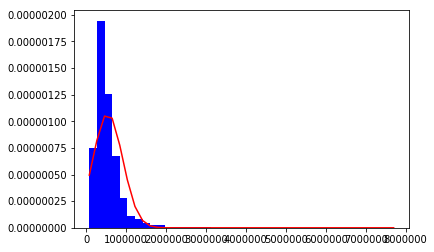

In [546]:
# Normalize target variable
mu = train_set.price.mean()
std = train_set.price.std()
print('mu: ', mu, ' std: ',std)

n, bins, patches = plt.hist(train_set.price, 40, density=1, facecolor='blue')

y = scipy.stats.norm.pdf(bins, mu, std)
plt.plot(bins, y, 'r-')
plt.show()

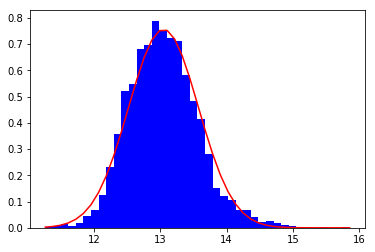

In [547]:
# normalize target variable
price_log = np.log(train_set.price)
price_log_mu = np.mean(price_log)
price_log_std = np.std(price_log)

n, bins, patches = plt.hist(price_log, 40, density=2, facecolor='blue')

y= scipy.stats.norm.pdf(bins, price_log_mu, price_log_std)
plt.plot(bins, y, 'r-')
plt.show()


In [548]:
# replacing train_set.price with log-transformed price
original_price = train_set.price.copy()
train_set.price = price_log
train_set.corr(method='pearson').price.sort_values(ascending=False)

price            1.000000
grade            0.707412
sqft_living      0.697907
sqft_living15    0.621800
sqft_above       0.607197
bathrooms        0.552000
lat              0.444417
bedrooms         0.359946
view             0.347505
floors           0.317810
sqft_basement    0.314378
waterfront       0.172580
yr_renovated     0.127533
sqft_lot         0.108946
sqft_lot15       0.096976
yr_built         0.076294
long             0.054362
condition        0.042947
id               0.035940
zipcode         -0.039195
Name: price, dtype: float64

In [549]:
# sqft_living = sqft_above + sqft_basement
# new feature 'with_basement'

# 1: with basement, 0: no basement
all_set['with_basement'] = np.select([all_set['sqft_basement'] > 0], [1], default=0)
all_set['with_basement'].value_counts()

0    13056
1     8447
Name: with_basement, dtype: int64

In [550]:
# add feature with_garret
# 1: with garret, 0: no garret
all_set['with_garret'] = np.select([all_set.floors.astype('str').str.slice(2,3) == '5'], [1], default = 0)
all_set['floors'] = all_set['floors'].astype('str').str.slice(0,1).astype('int')
print(all_set.floors.value_counts())
print(all_set.with_garret.value_counts())
all_set.dtypes

1    12507
2     8377
3      619
Name: floors, dtype: int64
0    19439
1     2064
Name: with_garret, dtype: int64


bathrooms        float64
bedrooms           int64
condition          int64
date               int32
floors             int32
grade              int64
id                 int64
lat              float64
long             float64
price            float64
sqft_above         int64
sqft_basement      int64
sqft_living        int64
sqft_living15      int64
sqft_lot           int64
sqft_lot15         int64
view               int64
waterfront         int64
yr_built           int64
yr_renovated       int64
zipcode            int64
with_basement      int32
with_garret        int32
dtype: object

In [551]:
# drop sqft_above and sqft_basement
all_set.drop(['sqft_above', 'sqft_basement'], axis=1, inplace=True)

In [552]:
# Divide date into 5 groups
print(all_set.groupby('date').agg('count'))

conditions = [all_set['date'] <=201406,
             (all_set['date'] > 201406) & (all_set['date'] <= 201408),
             (all_set['date'] > 201408) & (all_set['date'] <= 201410),
             (all_set['date'] > 201410) & (all_set['date'] <= 201412),
             (all_set['date'] > 201412) & (all_set['date'] <= 201502)]
choices = [1, 2, 3, 4, 5]

all_set['date_label'] = np.select(conditions, choices, default = 6)
all_set.drop('date', axis=1, inplace=True)
all_set.date_label.value_counts()

        bathrooms  bedrooms  condition  floors  grade    id   lat  long  \
date                                                                      
201405       1768      1768       1768    1768   1768  1768  1768  1768   
201406       2180      2180       2180    2180   2180  2180  2180  2180   
201407       2211      2211       2211    2211   2211  2211  2211  2211   
201408       1937      1937       1937    1937   1937  1937  1937  1937   
201409       1774      1774       1774    1774   1774  1774  1774  1774   
201410       1873      1873       1873    1873   1873  1873  1873  1873   
201411       1408      1408       1408    1408   1408  1408  1408  1408   
201412       1459      1459       1459    1459   1459  1459  1459  1459   
201501        969       969        969     969    969   969   969   969   
201502       1234      1234       1234    1234   1234  1234  1234  1234   
201503       1851      1851       1851    1851   1851  1851  1851  1851   
201504       2204      22

6    4690
2    4148
1    3948
3    3647
4    2867
5    2203
Name: date_label, dtype: int64

In [553]:
# add feature (renovated)
all_set['renovated'] = np.select([all_set['yr_renovated'] > 0], [1], default=0)
all_set.drop('yr_renovated', axis=1, inplace=True)
all_set['renovated'].value_counts()

0    20590
1      913
Name: renovated, dtype: int64

In [554]:
# add feature (living_greater) after comparing sqft_living and sqft_living15
all_set['living_greater'] = np.select([all_set['sqft_living'] >= all_set['sqft_living15']], [1], default=0)
all_set.drop('sqft_living15', axis=1, inplace=True)
all_set['living_greater'].value_counts()

1    12352
0     9151
Name: living_greater, dtype: int64

In [555]:
# add feature (lot_greater) after comparing sqft_lot and sqft_lot15
all_set['lot_greater'] = np.select([all_set['sqft_lot'] >= all_set['sqft_lot15']], [1], default=0)
all_set.drop('sqft_lot15', axis=1, inplace=True)
all_set['lot_greater'].value_counts()

1    13006
0     8497
Name: lot_greater, dtype: int64

Dropped columns from all_set: sqft_above, sqft_basement, date, yr_renovated, sqft_living15, sqft_lot15

In [556]:
# Train set and Test set
train_set = all_set.iloc[:len(train_set),:]
test_set = all_set.iloc[len(train_set):, :]

print("Train set:", train_set.shape, "\n Test set:", test_set.shape)

Train set: (15035, 21) 
 Test set: (6468, 21)


In [557]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(train_set.values, i) for i in range(train_set.shape[1])]
vif['features'] = train_set.columns

print(vif.sort_values(by='VIF_Factor', ascending=False))

      VIF_Factor        features
14  1.670991e+06         zipcode
7   1.343161e+06            long
6   1.591878e+05             lat
13  1.225763e+04        yr_built
4   1.483076e+02           grade
2   3.556870e+01       condition
9   3.464024e+01     sqft_living
0   2.968161e+01       bathrooms
1   2.641032e+01        bedrooms
3   1.658654e+01          floors
8   1.056425e+01           price
17  4.669392e+00      date_label
5   4.249920e+00              id
19  3.308396e+00  living_greater
20  2.636789e+00     lot_greater
15  2.331704e+00   with_basement
11  1.537522e+00            view
16  1.370129e+00     with_garret
12  1.256810e+00      waterfront
10  1.245861e+00        sqft_lot
18  1.205241e+00       renovated


In [558]:
# #Based on VIF, drop zipcode, long, lat
train_set.drop(['zipcode','long','lat','yr_built'], axis=1, inplace=True)
test_set.drop(['zipcode','long','lat','yr_built'], axis=1, inplace=True)
print('Train set: ', train_set.shape, '\n Test set: ', test_set.shape)

Train set:  (15035, 17) 
 Test set:  (6468, 17)


C:\Users\donny\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\donny\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [559]:
y_train = train_set.price
test_id = test_set.id
x_train = train_set.drop(['id', 'price'], axis=1).copy()
x_test = test_set.drop(['id','price'], axis=1).copy()

In [560]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train_df = pd.DataFrame(sc_x.fit_transform(x_train), columns=x_train.columns)
print(x_train_df)


       bathrooms  bedrooms  condition    floors     grade  sqft_living  \
0      -1.452865 -0.408931  -0.629020 -0.816745 -0.560048    -0.980140   
1      -1.452865 -1.516730  -0.629020 -0.816745 -1.407676    -1.424775   
2      -0.149923 -0.408931  -0.629020 -0.816745  0.287579    -0.437901   
3       0.175813 -0.408931  -0.629020  0.998446 -0.560048    -0.399945   
4      -0.801394 -0.408931  -0.629020 -0.816745 -0.560048    -1.110277   
5       0.501548 -0.408931  -0.629020 -0.816745  0.287579     1.600916   
6      -1.452865 -1.516730   0.917810 -0.816745 -0.560048    -1.001829   
7      -1.452865 -0.408931   0.917810 -0.816745 -0.560048    -0.709020   
8      -0.475658 -0.408931   0.917810 -0.816745 -0.560048    -0.774089   
9      -0.149923  1.806667  -0.629020 -0.816745 -0.560048    -0.296919   
10      1.153020  0.698868  -0.629020  0.998446  1.135206     0.939385   
11     -0.149923 -0.408931  -0.629020  0.998446 -0.560048    -0.210161   
12     -1.452865  0.698868   0.917810 

In [561]:
x_test_df = pd.DataFrame(sc_x.transform(x_test), columns=x_test.columns)
print(x_test_df)

      bathrooms  bedrooms  condition    floors     grade  sqft_living  \
0      0.175813 -0.408931  -0.629020  0.998446 -0.560048     0.527283   
1      1.153020  0.698868   2.464641 -0.816745 -0.560048    -0.134248   
2      3.107433  0.698868  -0.629020 -0.816745  2.830460     3.618043   
3     -1.452865 -0.408931  -0.629020 -0.816745 -0.560048    -0.329454   
4      0.501548 -0.408931  -0.629020  0.998446 -0.560048    -0.210161   
5      0.501548  1.806667  -0.629020  0.998446  0.287579     0.201940   
6     -0.475658 -0.408931  -0.629020 -0.816745 -0.560048    -0.611418   
7      0.501548  0.698868  -0.629020  0.998446  0.287579     0.527283   
8     -0.801394 -1.516730  -0.629020  2.813637 -0.560048    -0.969295   
9     -1.452865  0.698868  -3.722682 -0.816745 -2.255303    -0.459591   
10     0.501548  0.698868  -0.629020  0.998446  1.135206     0.527283   
11    -1.452865 -0.408931   0.917810 -0.816745 -1.407676    -0.871692   
12     0.501548 -0.408931  -0.629020  0.998446  0.2

In [562]:
# Multiple Regression
import statsmodels.api as sm
y = train_set.price.copy()
x = x_train_df.copy()
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1696.
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:55:19   Log-Likelihood:            -2.0671e+05
No. Observations:               15035   AIC:                         4.135e+05
Df Residuals:                   15019   BIC:                         4.136e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.407e+05   1847.033    292.730      0.000    5.37e+05    5.44e+05
bathrooms      -5892.8713   3254.690     -1.811      0.070   -1.23e+04     486.719
bedrooms       -3.429e+04   2436.385    -14.076      0.000   -3.91e+04   -2.95e+04
condition       3.573e+04   1964.005     18.193      0.000    3.19e+04    3.96e+04
floors          -218.3406   2573.728     -0.085      0.932   -5263.162    4826.481
grade           1.187e+05   3165.632     37.500      0.000    1.13e+05    1.25e+05
sqft_living     1.933e+05   3965.882     48.740      0.000    1.86e+05    2.01e+05
sqft_lot       -1.484e+04   1908.712     -7.776      0.000   -1.86e+04   -1.11e+04
view             4.47e+04   2129.770     20.986      0.000    4.05e+04    4.89e+04
waterfront      4.658e+04   2015.381     23.112      0.000    4.26e+04    5.05e+04
with_basement   2.011e+04   2124.589      9.463      0.000    1.59e+04    2.43e+04
with_garret      3.01e+04   1926.551     15.625      0.000    2.63e+04    3.39e+04
date_label      9897.1505   1852.757      5.342      0.000    6265.521    1.35e+04
renovated        2.91e+04   1876.587     15.506      0.000    2.54e+04    3.28e+04
living_greater -3.654e+04   2165.657    -16.873      0.000   -4.08e+04   -3.23e+04
lot_greater     7360.7104   1877.649      3.920      0.000    3680.289     1.1e+04
==============================================================================
Omnibus:                    11486.626   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           833392.021
Skew:                           3.083   Prob(JB):                         0.00
Kurtosis:                      38.949   Cond. No.                         4.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [572]:
x_train_df.drop('floors', axis=1, inplace=True)
x_test_df.drop('floors', axis=1, inplace=True)

In [591]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel= 'rbf')
x_train_kpca = kpca.fit_transform(x_train_df)
x_test_kpca = kpca.transform(x_test_df)

In [592]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [593]:
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(x_train_df, y_train, test_size=0.2, random_state=0)


at  1  :  280893.70632809476
at  2  :  243603.84474254015
at  3  :  234173.44161794992
at  4  :  228168.7116079175
at  5  :  223900.06157132259
at  6  :  221489.53319271616
at  7  :  221838.7700781874
at  8  :  219401.27511487794
at  9  :  218115.3110167196
at  10  :  218255.53119066858
at  11  :  217911.31925250904
at  12  :  218653.64394810144
at  13  :  217866.57333985457
at  14  :  217878.35202989535
at  15  :  217399.3386791394
at  16  :  216247.9824798796
at  17  :  215896.3147288407
at  18  :  215524.0794126659
at  19  :  216163.8092307851
at  20  :  216134.3851115698


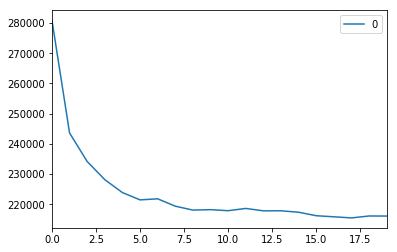

In [594]:
# Knn Regresssor
# find the best number of k
rmse = []
for k in range(1,21):
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    knn_regressor.fit(x_train_set, y_train_set)
    y_pred = knn_regressor.predict(x_test_set)
    error = sqrt(mean_squared_error(y_test_set, y_pred))
    rmse.append(error)
    print('at ', k, ' : ', error)
    
graph = pd.DataFrame(rmse)
graph.plot()


In [595]:
knn_reg = KNeighborsRegressor(n_neighbors=18)
knn_reg.fit(x_train_set, y_train_set)
y_pred = knn_reg.predict(x_test_set)
error = sqrt(mean_squared_error(y_test_set, y_pred))
print(error)


215524.0794126659


In [607]:
# Applying k-Fold Cross validation
from sklearn.cross_validation import cross_val_score
accuracies = cross_val_score(estimator=knn_reg, X = x_train_set, y=y_train_set, cv=10)

print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.619237   0.63193967 0.60862625 0.616516   0.61266526 0.57340239
 0.5818425  0.63350816 0.64220839 0.61155232]
0.6131497936762503
0.02059990777747737


In [596]:
# Decision Tree Regressor
dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train_set, y_train_set)
y_pred = dec_tree.predict(x_test_set)
error = sqrt(mean_squared_error(y_test_set, y_pred))
print(error)

261774.2986719594


In [606]:
# Applying k-Fold Cross validation
from sklearn.cross_validation import cross_val_score
accuracies = cross_val_score(estimator=dec_tree, X = x_train_set, y=y_train_set, cv=10)

print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.34584717 0.56747318 0.37861423 0.41265872 0.5753122  0.33212221
 0.07049553 0.53448789 0.47783981 0.4586675 ]
0.41535184517248525
0.14168396512874695


In [597]:
# Random Forest
rd_forest = RandomForestRegressor()
rd_forest.fit(x_train_set, y_train_set)
y_pred = rd_forest.predict(x_test_set)
error = sqrt(mean_squared_error(y_test_set, y_pred))
print(error)

202873.74593041927


In [600]:
# Applying k-Fold Cross validation
from sklearn.cross_validation import cross_val_score
accuracies = cross_val_score(estimator=rd_forest, X = x_train_set, y=y_train_set, cv=10)

print(accuracies)
print(accuracies.mean())
print(accuracies.std())

In [582]:
submission = pd.DataFrame({
                           'id': price,
                           'price': y_pred
                           })
submission.to_csv('submission.csv', index=False)

ValueError: array length 3007 does not match index length 6468